<a href="https://colab.research.google.com/github/LeoCh97/Tesi/blob/master/Image_loader_over_sampled_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as matplot
import os 
import cv2
from tqdm import tqdm_notebook 

DATADIR1 = "FlickrLogos-v2/classes/jpg"
DATADIR2 = "images"
BBDIR1 = "FlickrLogos-v2/classes/masks"
IMG_SIZE = 128

with open("Flickrplus_num.txt", 'r') as f:
  if f.mode == 'r':
    NUM_OF_IMG = int(f.read())

CATEGORIES = []
for category in os.listdir(DATADIR1):
    if category != ".DS_Store":
        CATEGORIES.append(category)
try:
  assert len(CATEGORIES) == 33
except AssertionError as e:
  print("Wrong number of classes", e)

In [2]:
print(CATEGORIES)

['carlsberg', 'aldi', 'ups', 'cocacola', 'starbucks', 'tsingtao', 'no-logo', 'corona', 'chimay', 'shell', 'dhl', 'apple', 'becks', 'texaco', 'fosters', 'esso', 'rittersport', 'ferrari', 'google', 'pepsi', 'ford', 'heineken', 'milka', 'fedex', 'erdinger', 'nvidia', 'bmw', 'stellaartois', 'HP', 'guinness', 'paulaner', 'singha', 'adidas']


In [0]:
import pandas as pd

train_data_names = pd.read_csv('FlickrLogos-v2/trainset.txt', header=None, names=['category', 'img_name'])
test_data_names = pd.read_csv('FlickrLogos-v2/testset.txt', header=None, names=['category', 'img_name'])
val_data_names = pd.read_csv('FlickrLogos-v2/valset.txt', header=None, names=['category', 'img_name'])
data_names_plus = pd.read_csv('Flickrplus_groundtruth.txt')

data_names_plus = data_names_plus.values.tolist()
train_data_names = train_data_names.values.tolist()
test_data_names = test_data_names.values.tolist()
val_data_names = val_data_names.values.tolist()

In [3]:
train_split = []

def create_train_data():
  for category,img in tqdm_notebook(train_data_names):
    if category == "guiness":
      data_path = os.path.join(DATADIR1, "guinness")
      bbox_path = os.path.join(BBDIR1, "guinness")
      data_num = CATEGORIES.index("guinness")
    else:
      data_path = os.path.join(DATADIR1, category)
      bbox_path = os.path.join(BBDIR1, category)
      data_num = CATEGORIES.index(category)
    
    try:
      img_array = cv2.imread(os.path.join(data_path,img))
      img_bbox = pd.read_csv(os.path.join(bbox_path,img+".bboxes.txt"), sep=" ")
      
      x = img_bbox['x'][0]
      y = img_bbox['y'][0]
      w = img_bbox['width'][0]
      h = img_bbox['height'][0]
      
      img_array = img_array[y:y+h, x:x+w]
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      train_split.append([new_array, data_num])
    except Exception as e:
      print("general exception", e, os.path.join(data_path,img))
    except OSError as e:
      print("OSError Bad img most likely", e, os.path.join(data_path,img)) 
    
create_train_data()

In [12]:
test_split = []

def create_test_data():
  for category,img in tqdm_notebook(test_data_names):
    if category == "guiness":
      data_path = os.path.join(DATADIR1, "guinness")
      bbox_path = os.path.join(BBDIR1, "guinness")
      data_num = CATEGORIES.index("guinness")
    else:
      data_path = os.path.join(DATADIR1, category)
      bbox_path = os.path.join(BBDIR1, category)
      data_num = CATEGORIES.index(category)
    
    try:
      img_array = cv2.imread(os.path.join(data_path,img))
      
      if category != "no-logo":
        img_bbox = pd.read_csv(os.path.join(bbox_path,img+".bboxes.txt"), sep=" ")
      
        x = img_bbox['x'][0]
        y = img_bbox['y'][0]
        w = img_bbox['width'][0]
        h = img_bbox['height'][0]
      
        img_array = img_array[y:y+h, x:x+w]
      
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      test_split.append([new_array, data_num])
    except Exception as e:
      print("general exception", e, os.path.join(data_path,img))
    except OSError as e:
      print("OSError Bad img most likely", e, os.path.join(data_path,img)) 
    
  
create_test_data()

In [0]:
val_split = []

def create_val_data():
  no_logo_train = 0
  
  for category,img in tqdm_notebook(val_data_names):
    
    
    if category == "guiness":
      data_path = os.path.join(DATADIR1, "guinness")
      bbox_path = os.path.join(BBDIR1, "guinness")
      data_num = CATEGORIES.index("guinness")
    else:
      data_path = os.path.join(DATADIR1, category)
      bbox_path = os.path.join(BBDIR1, category)
      data_num = CATEGORIES.index(category)
    
    try:
      img_array = cv2.imread(os.path.join(data_path,img))
      
      if category != "no-logo":
        img_bbox = pd.read_csv(os.path.join(bbox_path,img+".bboxes.txt"), sep=" ")
      
        x = img_bbox['x'][0]
        y = img_bbox['y'][0]
        w = img_bbox['width'][0]
        h = img_bbox['height'][0]
      
        img_array = img_array[y:y+h, x:x+w]
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        val_split.append([new_array, data_num])
        
      elif no_logo_train < 250:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        train_split.append([new_array, data_num])
        no_logo_train += 1
      else:
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        val_split.append([new_array, data_num])
      
    except Exception as e:
      print("general exception", e, os.path.join(data_path,img))
    except OSError as e:
      print("OSError Bad img most likely", e, os.path.join(data_path,img)) 
    
  
create_val_data()

In [7]:
print(data_names_plus[NUM_OF_IMG-1][1])

ups


In [5]:
def extend_splits():
  racoons = 0
  train_or_val=True
  
  for filename, category, x, y, w, h, bbox in tqdm_notebook(data_names_plus[0:NUM_OF_IMG]):
    img_path = os.path.join(DATADIR2, filename)
    data_num = CATEGORIES.index(category)
    
    try:
      img = cv2.imread(img_path)
      new_array = img[y:y+h, x:x+w]
      
      new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
      
      if train_or_val:
        train_split.append([new_array, data_num])
        train_or_val = (not train_or_val)
      else:
        val_split.append([new_array, data_num])
        train_or_val = (not train_or_val)
    except Exception as e:
      print("general exception", e, img_path)
    except OSError as e:
      print("OSErrorBad img most likely", e, img_path) 
        
    try:
      for giraffe in range(2, bbox):
        x_1 = data_names_plus[NUM_OF_IMG-1+giraffe+racoons][2]
        y_1 = data_names_plus[NUM_OF_IMG-1+giraffe+racoons][3]
        w_1 = data_names_plus[NUM_OF_IMG-1+giraffe+racoons][4]
        h_1 = data_names_plus[NUM_OF_IMG-1+giraffe+racoons][5]
        new_array = img[y:y+h, x:x+w]

        new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))

        if train_or_val:
          train_split.append([new_array, data_num])
          train_or_val = (not train_or_val)
        else:
          val_split.append([new_array, data_num])
          train_or_val = (not train_or_val)

      racoons += bbox - 1

    except Exception as e:
      print("general exception 2", e, img_path)
    except OSError as e:
      print("OSErrorBad img most likely 2", e, img_path) 
    
    
extend_splits()

Number of categories:  33
Average number of elements per category:  265.24242424242425
Max number of elements:  2750


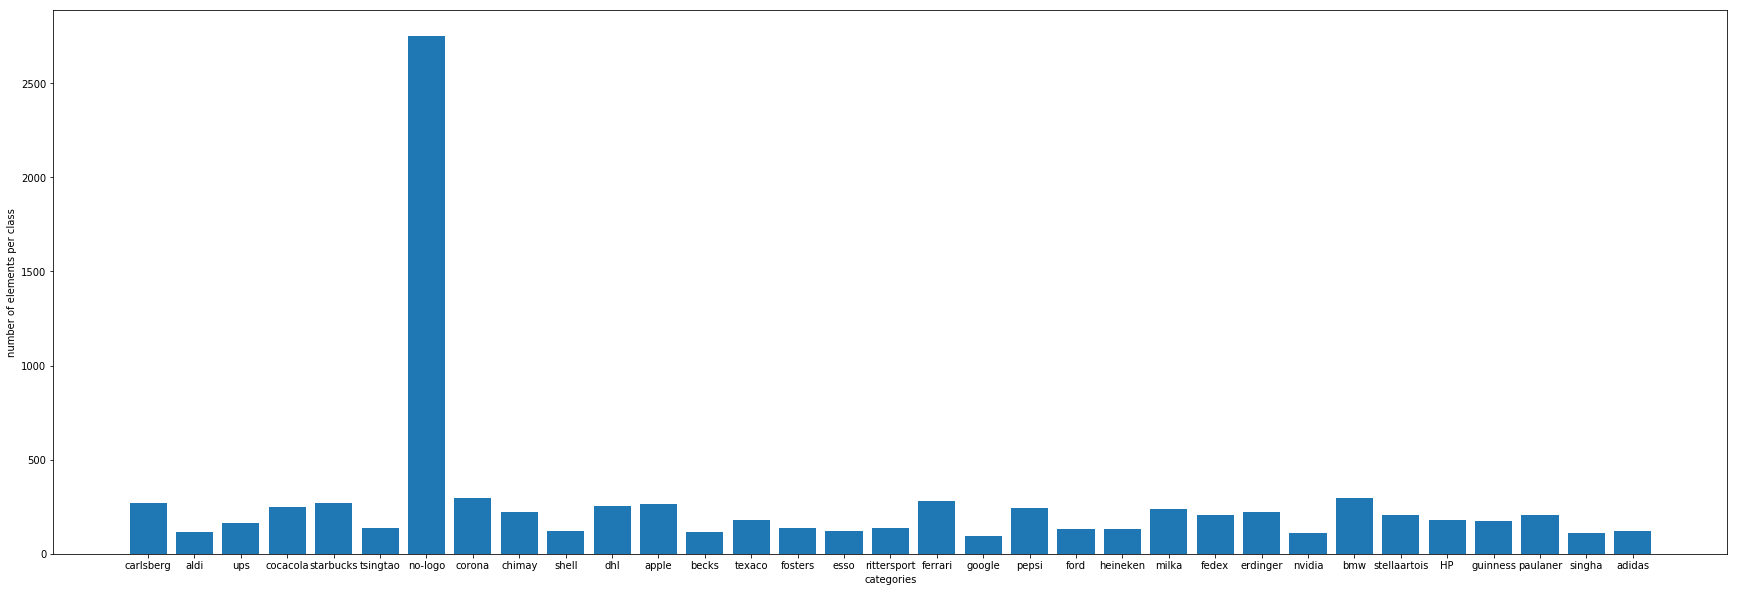

In [6]:
val_per_class_el = [sum(val_split[i][1] == category for i in range(len(val_split))) for category in range(len(CATEGORIES))]
val_avg_el = np.mean(val_per_class_el)
val_max_el = np.max(val_per_class_el)
old_val_class_el = np.copy(val_per_class_el)

print("Number of categories: ", len(val_per_class_el))
print("Average number of elements per category: ", val_avg_el)
print("Max number of elements: ", val_max_el)

matplot.figure(figsize=(30,10))
matplot.bar(CATEGORIES, val_per_class_el)
matplot.ylabel('number of elements per class')
matplot.xlabel('categories')
matplot.show()

Number of categories:  33
Average number of elements per category:  170.0909090909091
Max number of elements:  274


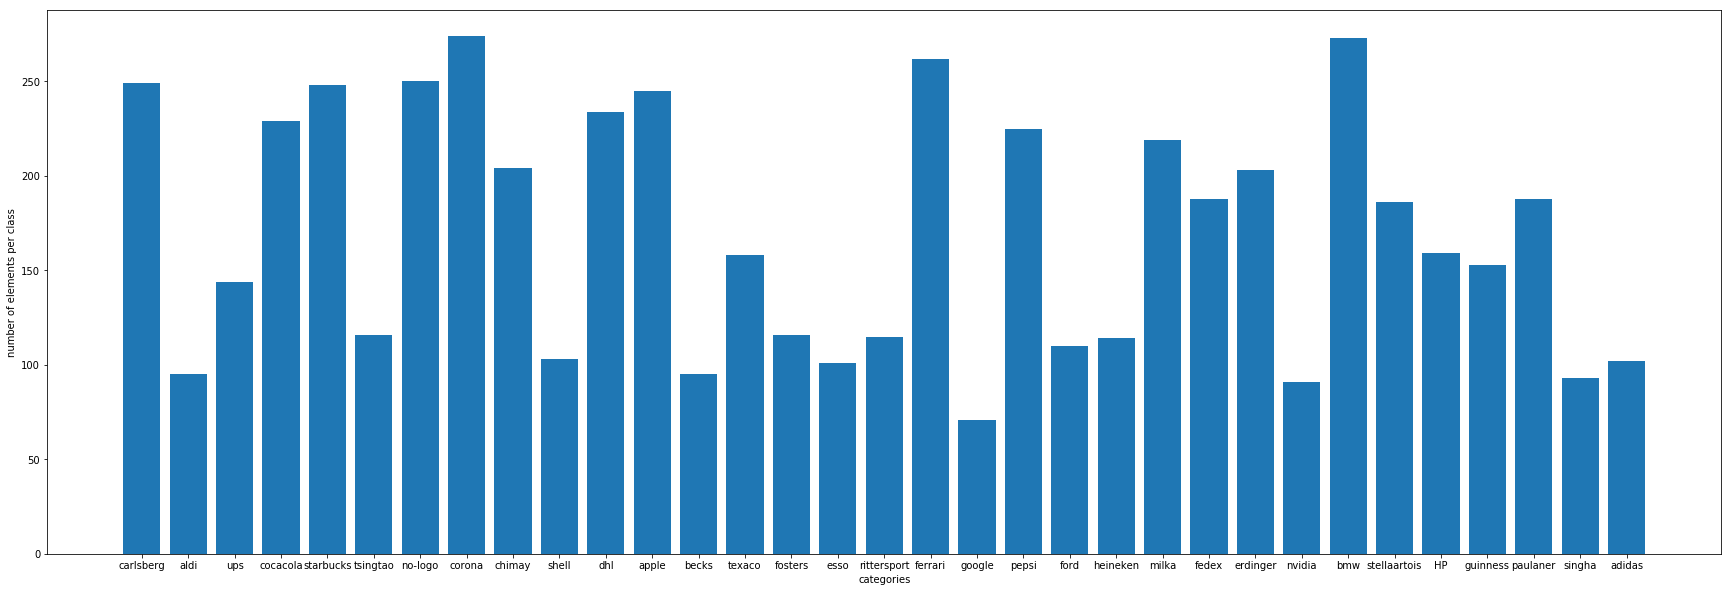

In [7]:
train_per_class_el = [sum(train_split[i][1] == category for i in range(len(train_split))) for category in range(len(CATEGORIES))]
train_avg_el = np.mean(train_per_class_el)
train_max_el = np.max(train_per_class_el)
old_train_class_el = np.copy(train_per_class_el)

print("Number of categories: ", len(train_per_class_el))
print("Average number of elements per category: ", train_avg_el)
print("Max number of elements: ", train_max_el)

matplot.figure(figsize=(30,10))
matplot.bar(CATEGORIES, train_per_class_el)
matplot.ylabel('number of elements per class')
matplot.xlabel('categories')
matplot.show()

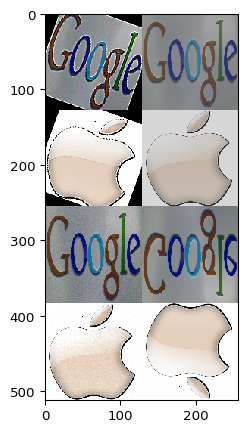

In [9]:
from imgaug import augmenters as iaa

aug = iaa.SomeOf(2, [
    iaa.Affine(rotate=20),
    iaa.AdditiveGaussianNoise(scale=0.02*255),
    iaa.Add(40),
    iaa.Sharpen(alpha=0.4),
    iaa.ContrastNormalization((0.5, 1.5)),
    iaa.Fliplr(0.2),
    iaa.Flipud(0.3)
])

aug.show_grid([train_split[0][0], train_split[11][0]], cols=2, rows=2)

In [10]:
import random

for category in CATEGORIES:
    index = CATEGORIES.index(category)
    temp_images = [img for img, cat in train_split if (cat == index)]
    is_less_than = (train_per_class_el[index] < train_max_el/2 + 15)
    
    while is_less_than:
      aug_images = aug.augment_images(temp_images)
      
      for i in tqdm_notebook(range(len(temp_images))):
        train_split.append([aug_images[i], index])
      
      train_per_class_el[index] = train_per_class_el[index]*2
      is_less_than = (train_per_class_el[index] < train_max_el/2)
      
      random.shuffle(temp_images)


False



False



False



False



False



False



False



False



False



False



False



False



False



False


Number of categories:  33
Average number of elements per category:  214.5151515151515
Max number of elements:  288


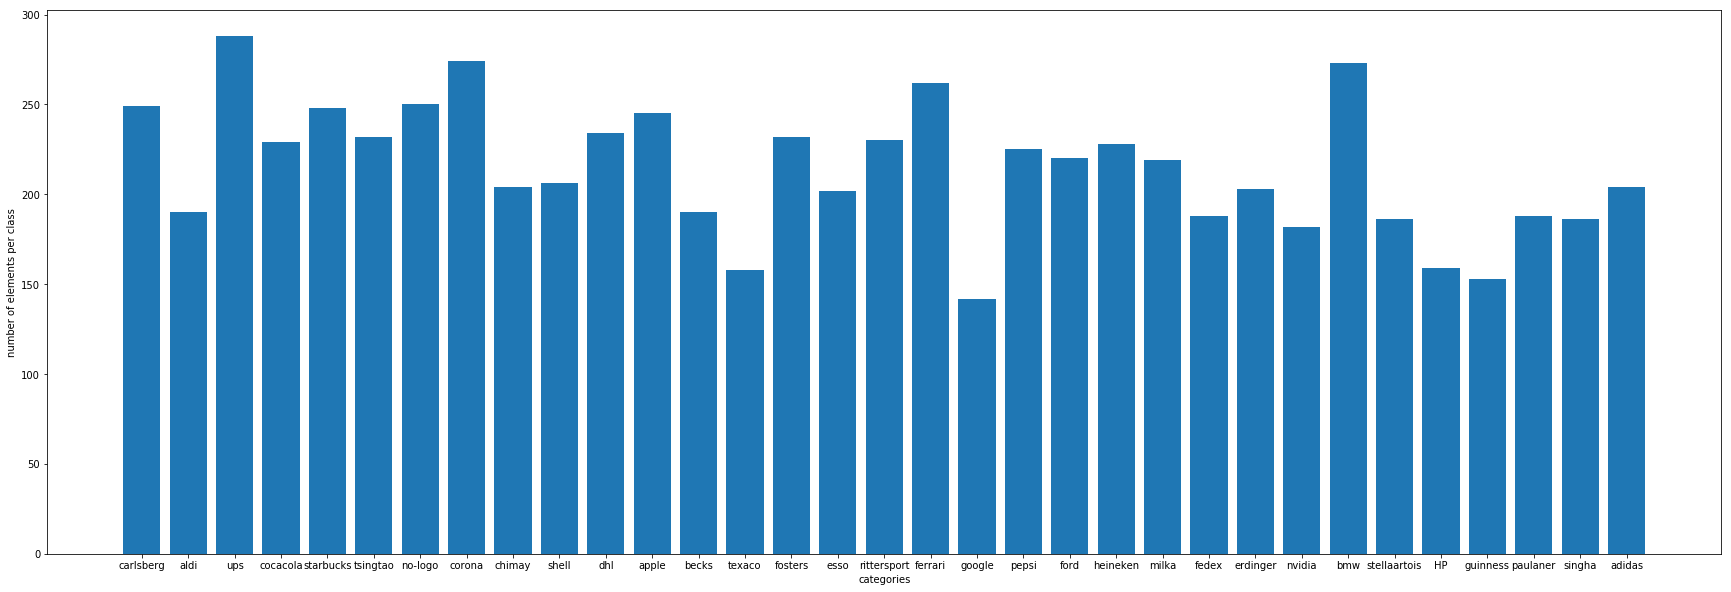

In [11]:
new_train_avg_el = np.mean(train_per_class_el)
new_train_max_el = np.max(train_per_class_el)

print("Number of categories: ", len(train_per_class_el))
print("Average number of elements per category: ", new_train_avg_el)
print("Max number of elements: ", new_train_max_el)

matplot.figure(figsize=(30,10))
matplot.bar(CATEGORIES, train_per_class_el)
matplot.ylabel('number of elements per class')
matplot.xlabel('categories')
matplot.show()

google
apple
carlsberg
adidas
bmw
cocacola
becks
chimay
dhl


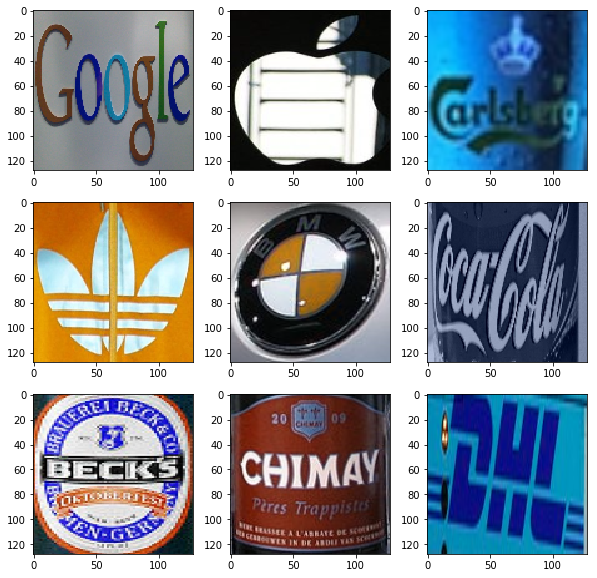

In [14]:
fig = matplot.figure(figsize=(10,10))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1)
        ax.imshow(train_split[i * 400 + j * 600][0])
        print(CATEGORIES[train_split[i * 400 + j * 600][1]])

In [13]:
print(len(train_split))
print(len(test_split))
print(len(val_split))

7079
3960
8753


In [0]:
random.shuffle(train_split)
random.shuffle(val_split)
random.shuffle(test_split)

In [17]:
for sample in train_split[:10]:
    print(sample[1])

17
4
30
4
15
19
21
19
23
19


In [0]:
X_train = []
y_train = []

for features,label in train_split:
    X_train.append(features)
    y_train.append(label)

In [19]:
print(X_train[321].shape)

(128, 128, 3)


7079
rittersport
stellaartois
ups
erdinger
ford
fedex
stellaartois
singha
ferrari


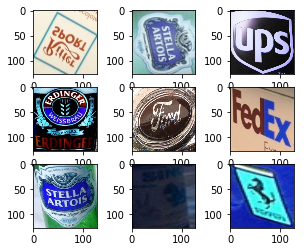

In [16]:
print(len(X_train))

fig = matplot.figure(figsize=(5,4))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1)
        ax.imshow(X_train[i * 3 + j + 340])
        print(CATEGORIES[y_train[i * 3 + j + 340]])
        
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [0]:
X_test = []
y_test = []

for features,label in test_split:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [0]:
X_val = []
y_val = []

for features,label in val_split:
    X_val.append(features)
    y_val.append(label)

X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [0]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()